In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')



In [9]:
df = pd.read_csv('./data/events.csv', low_memory=False)
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
events = df['event']
print(events.size == events.count())

True


In [11]:
events_vc = df['event'].value_counts()
events_vc

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [12]:
products_top5 = products['sku'].value_counts().head(5)
products_top5

NameError: name 'products' is not defined

In [ ]:
g = products_top5.plot.bar()
g.set_title("Top 5 de productos comprados por usuarios", fontsize=18)
g.set_xlabel("SKU", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)

In [13]:
users = df['person']
users_top10 = users.value_counts().head(10)
users_top10

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

Text(0,0.5,'Frecuencia ')

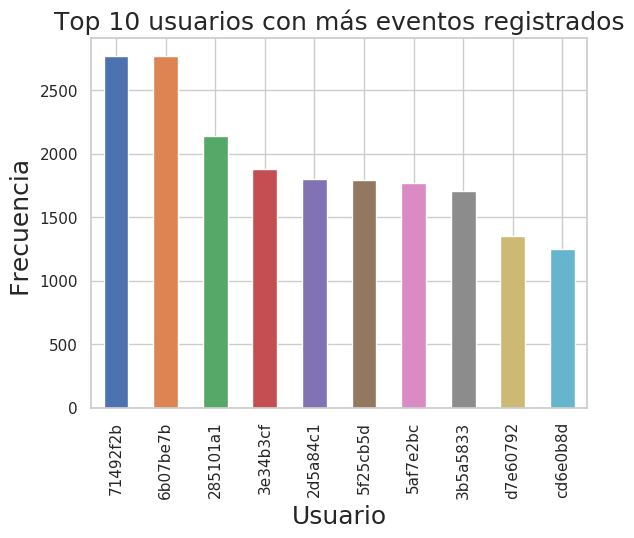

In [14]:
g = users_top10.plot.bar()
g.set_title("Top 10 usuarios con más eventos registrados", fontsize=18)
g.set_xlabel("Usuario", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)

In [15]:
otro  = df[['person','new_vs_returning']]
otro

,person,new_vs_returning
0,0004b0a2,NaN
1,0004b0a2,New
2,0004b0a2,NaN
3,0004b0a2,NaN
4,0006a21a,NaN
5,0006a21a,New
6,0006a21a,NaN
7,0006a21a,NaN
8,000a54b2,NaN
9,000a54b2,New


Veo que cantidad de nuevos usuarios realizaron un evento por primera vez y cuantos volvieron a contabilizar un evento

In [16]:
df['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

In [18]:
df['month'].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [19]:

events_short = df.filter(items=['person','event' ,'new_vs_returning','month'])
events_short['Cantidad de Eventos'] = 1
events_short['Conversiones'] = events_short['event'] == 'conversion'
events_short

,person,event,new_vs_returning,month,Cantidad de Eventos,Conversiones
0,0004b0a2,ad campaign hit,NaN,5,1,False
1,0004b0a2,visited site,New,5,1,False
2,0004b0a2,viewed product,NaN,5,1,False
3,0004b0a2,checkout,NaN,5,1,False
4,0006a21a,viewed product,NaN,5,1,False
5,0006a21a,visited site,New,5,1,False
6,0006a21a,ad campaign hit,NaN,5,1,False
7,0006a21a,checkout,NaN,5,1,False
8,000a54b2,generic listing,NaN,4,1,False
9,000a54b2,visited site,New,4,1,False


Separo la cantidad de usuarios new y returning por mes

In [20]:
grouped = events_short.groupby(['new_vs_returning','month']).agg({'Cantidad de Eventos':'sum'})

In [21]:
grouped

Cantidad de Eventos
new_vs_returning month                     
New              1                      517
                 2                      499
                 3                     1125
                 4                     1627
                 5                    12604
                 6                    10526
Returning        1                     1618
                 2                     2291
                 3                     6122
                 4                    11023
                 5                    27533
                 6                    11893

# Agrupo por mes cuantas conversiones hubo

In [22]:
grouped = events_short.groupby(['month']).agg({'Conversiones':'sum'})
grouped

,Conversiones
month,
1,63.0
2,74.0
3,265.0
4,316.0
5,351.0
6,103.0


# Quiero ver cuantos eventos necesitó la gente para hacer una conversion

In [33]:
grupo = events_short.groupby(['person']).agg({'Cantidad de Eventos':'sum', 'Conversiones':'sum'}) 
#grupo.loc[grupo['Conversion'] == False, :]
#grupo = grupo.groupby(['Cantidad de Eventos']).agg({'Conversiones':'sum'}) 
#grupo['Conversion'].sum()
grupo['Cant de Personas'] = 1
grupo = grupo.groupby(['Cantidad de Eventos']).agg({'Conversiones':'sum', 'Cant de Personas':'sum'}) 
grupo[grupo.Conversiones > 0]

,Conversiones,Cant de Personas
Cantidad de Eventos,,
2,55.0,428
3,21.0,512
4,7.0,3248
5,11.0,1514
6,6.0,1282
7,8.0,1126
8,15.0,1178
9,2.0,909
10,2.0,943


In [51]:
grupo_max = grupo[grupo.Conversiones > 0]

grupo_max.sort_values(by='Conversiones', ascending=False).head()
#La mayor cantidad de conversiones se registra con 2 eventos

,Conversiones,Cant de Personas
Cantidad de Eventos,,
2,55.0,428
3,21.0,512
120,15.0,16
136,15.0,21
8,15.0,1178


In [50]:
grupo_max.sort_values(by='Cant de Personas', ascending=False).head()
#La mayoria de las personas tienen 7 eventos antes de hacer una conversion

,Conversiones,Cant de Personas
Cantidad de Eventos,,
4,7.0,3248
5,11.0,1514
6,6.0,1282
8,15.0,1178
7,8.0,1126
